Importing Dependencies

In [117]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis
PIMA Diabetics dataset

In [118]:
#loading the diabetes dataset to a pandas Datafrom
diabetics_dataset = pd.read_csv('/content/diabetes.csv')

In [119]:
diabetics_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


checking for any missing value

In [120]:
diabetics_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [121]:
diabetics_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [122]:
pd.read_csv?

In [123]:
diabetics_dataset.shape

(768, 9)

In [124]:
diabetics_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [125]:
diabetics_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [126]:
#separating the data and labels
X = diabetics_dataset.drop(columns = 'Outcome' , axis =1)
Y = diabetics_dataset['Outcome']

In [127]:
print(X)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [128]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data standardizartion

In [129]:
scaler = StandardScaler()

In [130]:
scaler.fit(X)

StandardScaler()

In [131]:
standardized_data = scaler.transform(X)

In [132]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


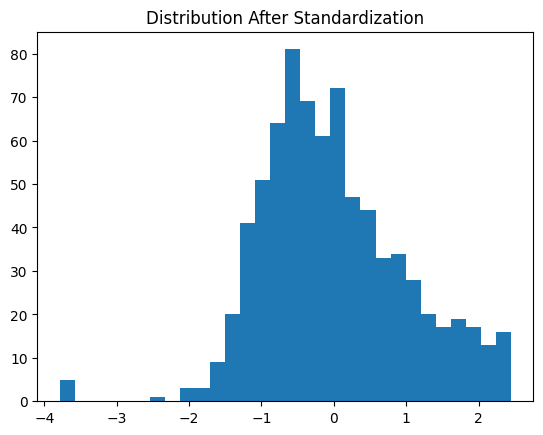

In [133]:
import matplotlib.pyplot as plt

plt.hist(standardized_data[:, 1], bins=30)
plt.title("Distribution After Standardization")
plt.show()

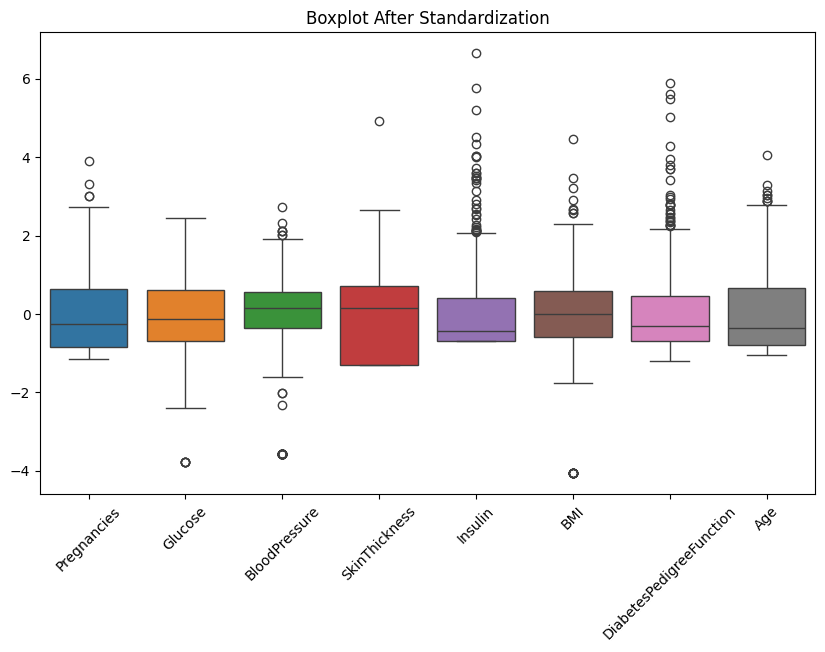

In [134]:
import seaborn as sns
import pandas as pd

standardized_df = pd.DataFrame(standardized_data, columns=X.columns)

plt.figure(figsize=(10,6))
sns.boxplot(data=standardized_df)
plt.xticks(rotation=45)
plt.title("Boxplot After Standardization")
plt.show()

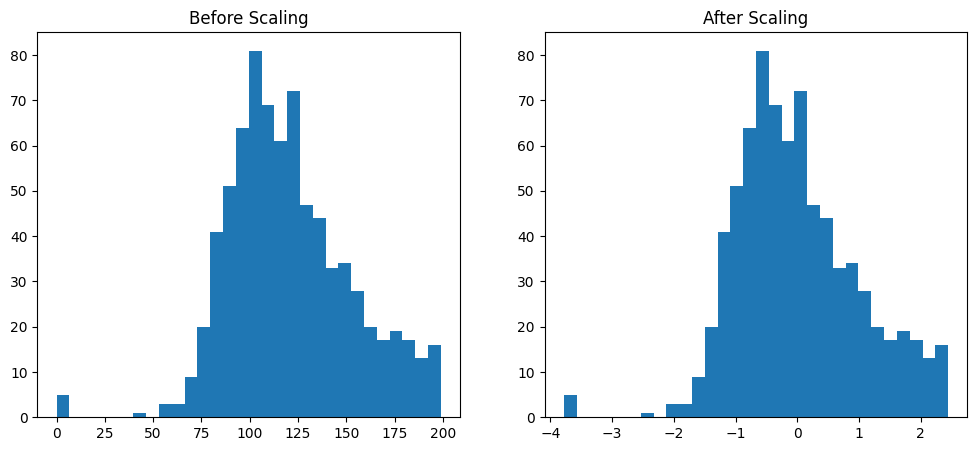

In [135]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].hist(X['Glucose'], bins=30)
ax[0].set_title("Before Scaling")

ax[1].hist(standardized_df['Glucose'], bins=30)
ax[1].set_title("After Scaling")

plt.show()

In [136]:
X = standardized_data
Y = diabetics_dataset['Outcome']

In [137]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify= Y, random_state = 2)

In [139]:

print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [140]:
print(Y.shape, Y_train.shape, Y_test.shape)

(768,) (614,) (154,)


Model Training

In [141]:
Classifier = svm.SVC(kernel = 'linear')


#training the support cevtor Mchine  lassifier
Classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [142]:
# Make predictions on the test data
X_test_prediction = Classifier.predict(X_test)
print(X_test_prediction)

[0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0]


In [143]:
# Calculate the accuracy score on the test data
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(f'Accuracy score on test data: {test_data_accuracy:.2f}')

Accuracy score on test data: 0.77


Making Prediction

In [144]:
input_data = '4,110,92,0,0,37.6,0.191,30'
# changing the input_data to numpy array by splitting the string and converting to float
input_data_as_numpy_array = np.asarray([float(x) for x in input_data.split(',')])
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)
prediction = Classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The person is not diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
